<a href="https://colab.research.google.com/github/geonextgis/End-to-End-Machine-Learning/blob/main/03_Machine_Learning_Algorithms%20/05_Decision_Tree/01_Regression_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Trees**
Regression trees are powerful predictive modeling tools used in the field of machine learning and statistical analysis. They belong to the broader category of decision trees, which are versatile algorithms capable of handling both classification and regression tasks. While classification trees are designed for predicting categorical outcomes, regression trees specialize in estimating continuous numeric values.

At their core, regression trees employ a hierarchical structure resembling a flowchart, where each internal node represents a decision based on a feature, and each leaf node provides a prediction for the target variable. Through a process of recursive partitioning, the algorithm divides the dataset into increasingly homogeneous subsets, optimizing the predictive accuracy of the model.

One of the distinguishing features of regression trees is their ability to capture nonlinear relationships between input variables and the target variable. This flexibility makes them well-suited for analyzing complex datasets where traditional linear models may fall short. Additionally, regression trees offer interpretability, allowing users to understand the decision-making process and derive insights from the model's structure.

Despite their strengths, regression trees are not without challenges. They are susceptible to overfitting, particularly when trained on noisy or high-dimensional data. Techniques such as pruning, regularization, and ensemble methods are commonly employed to mitigate overfitting and enhance generalization performance.

In this context, understanding the principles underlying regression trees, including the process of node splitting, pruning strategies, and performance evaluation metrics, is crucial for effectively applying them to real-world problems. By leveraging their interpretability and flexibility, regression trees offer a valuable tool for predictive modeling across various domains, from finance and healthcare to marketing and beyond.

Key Points to Highlight:
1. **Hierarchical Structure**: Regression trees utilize a hierarchical structure where decisions are made at each node based on feature values, leading to the partitioning of the dataset into increasingly homogeneous subsets.
2. **Nonlinear Relationships**: Unlike linear models, regression trees can capture complex nonlinear relationships between input variables and the target variable, making them suitable for diverse datasets.
3. **Interpretability**: The transparent nature of regression trees allows users to interpret the decision-making process, facilitating insights into the factors driving predictions.
4. **Challenges**: Regression trees are prone to overfitting, especially with noisy or high-dimensional data, necessitating the use of techniques like pruning and regularization.
5. **Practical Applications**: Regression trees find applications across various domains, including finance, healthcare, marketing, and more, owing to their flexibility and predictive capabilities.

## **Import Required Libraries**

In [43]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

## **Load the Data**

In [45]:
# Read the California housing data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub Repo/Mastering-Machine-Learning-and-GEE-for-Earth-Science/Datasets/housing.csv")
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Data Preprocessing**

In [46]:
# Apply one hot encoding on 'ocean_proximity' column
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [47]:
# Drop the rows with null values
df.dropna(inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


## **Train Test Split**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("median_house_value", axis=1),
                                                    df["median_house_value"],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((14303, 12), (6130, 12))

## **Train a Decision Tree Regression Model**

In [49]:
# Instantiate a decision tree regressor object
dtr = DecisionTreeRegressor()

# Fit the training data
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [50]:
# Predict the test data
y_pred = dtr.predict(X_test)

In [51]:
print("Cross Validation R2 Score:",
      np.mean(cross_val_score(dtr, X_train, y_train, scoring="r2", cv=10)))

Cross Validation R2 Score: 0.6357474536934802


## **Hyperparameter Tuning**

In [52]:
# Instantiate another decision tree regressor object
dtr2 = DecisionTreeRegressor()

In [53]:
# Create the parameters grid
dtr2_param_grid = {
    "max_depth": [2, 4, 8, 10, None],
    "criterion": ["absolute_error", "squared_error"],
    "min_samples_split": [4, 8, 10, 12, None],
    "min_samples_leaf": [1, 2, 4, 6, None],
    "max_features": [0.25, 0.5, 0.75, 1.0, None]
}

In [55]:
# Apply the RandomizedSearchCV to find the best hyperparameters
dtr2_grid = RandomizedSearchCV(estimator=dtr2,
                               param_distributions=dtr2_param_grid,
                               n_iter=100,
                               scoring="r2",
                               n_jobs=-1,
                               cv=5,
                               verbose=2)

# Fit the training data
dtr2_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['absolute_error',
                                                      'squared_error'],
                                        'max_depth': [2, 4, 8, 10, None],
                                        'max_features': [0.25, 0.5, 0.75, 1.0,
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, None],
                                        'min_samples_split': [4, 8, 10, 12,
                                                              None]},
                   scoring='r2', verbose=2)

In [56]:
# Print the best parameters
dtr2_grid.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 1.0,
 'max_depth': 10,
 'criterion': 'squared_error'}

In [57]:
# Print the best score
dtr2_grid.best_score_

0.7257200715152782

In [58]:
# Train the model with best parameters
dtr2 = dtr2_grid.best_estimator_
dtr2

DecisionTreeRegressor(max_depth=10, max_features=1.0, min_samples_leaf=6,
                      min_samples_split=10)

## **Accuracy Assessment**

In [59]:
# Predict the test data
y_pred = dtr2.predict(X_test)

In [60]:
# Calculate the R2 Score
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.7257715814358241


## **Feature Importance**

In [61]:
# Extract the feature importance in a dataframe
feature_importance = pd.Series(dtr2.feature_importances_, index=X_train.columns)\
                       .sort_values(ascending=False)
feature_importance

median_income                 0.561224
ocean_proximity_INLAND        0.172765
longitude                     0.096929
latitude                      0.089707
housing_median_age            0.043500
population                    0.011840
ocean_proximity_NEAR OCEAN    0.008246
total_bedrooms                0.006552
households                    0.005393
total_rooms                   0.003648
ocean_proximity_NEAR BAY      0.000198
ocean_proximity_ISLAND        0.000000
dtype: float64

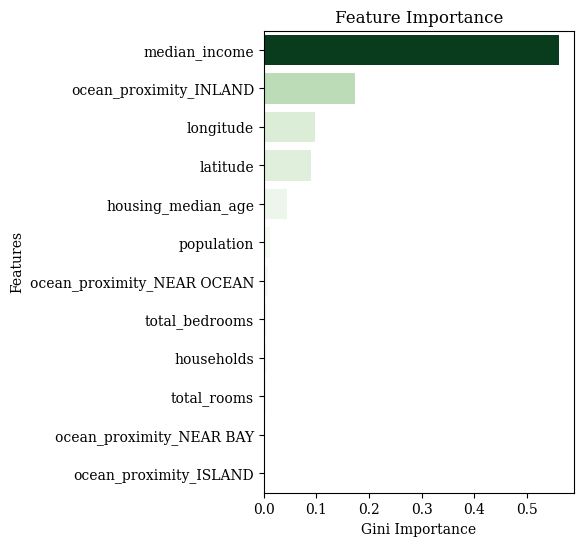

In [74]:
# Plot the feature importance
plt.figure(figsize=(4, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, hue=feature_importance,
            palette="Greens", legend=False)
plt.title("Feature Importance")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.show()